<div style="line-height:1.2;">

<h1 style="color:#FF7C00; margin-bottom: 0.5em;"> UNET with Tensorflow 1 </h1>

<h4 style="margin-top: 0.3em; margin-bottom: 1.5em;"> U-Net model example, based on the Electron microscopy (EM) dataset.</h4>

<div style="line-height:1.4; margin-bottom: 1em;">
    <h3 style="color: lightblue; display: inline; margin-right: 0.5em;">Keywords:</h3>
    tif images + skimage imshow + np.squeeze + skimage resize
</div>

<div style="line-height:1.4; margin-top: 1em;">
    <h3 style="color: red; display: inline; margin-right: 0.5em;">Notes:</h3> The 'Electron_Microscopy' folder was not uploaded since it weight 4 Gb.
</div>

</div>

In [7]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import random
import zipfile
import tifffile
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tqdm import tqdm

from sklearn.model_selection import train_test_split

from skimage.transform import resize
from skimage.io import imread, imshow

In [3]:
#!pip install tifffile

Electron_Microscopy dataset from "https://www.epfl.ch/labs/cvlab/data/data-em/"

In [4]:
#%%script echo Skipping. Comment when using Colab, to get data from gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [11]:
zip_images = "/content/gdrive/MyDrive/Colab_datasets/Electron_Microscopy.zip"

In [12]:
with zipfile.ZipFile(zip_images, 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [14]:
""" Load TIFF image with multiple channels/frames (replace )
N.B.
replace paths "./" with "./img_folder/" if not on Colab
"""
tiff_images = tifffile.imread('./Electron_Microscopy/volumedata.tif')
tiff_images_training_x = tifffile.imread('./Electron_Microscopy/training.tif')
tiff_images_training_y = tifffile.imread('./Electron_Microscopy/training_groundtruth.tif')
tiff_images_testing_x = tifffile.imread('./Electron_Microscopy/testing.tif')
tiff_images_testing_y = tifffile.imread('./Electron_Microscopy/testing_groundtruth.tif')

In [15]:
resized_images_training_x = []
resized_images_training_y = []
resized_images_testing_x = []
resized_images_testing_y = []

resized_images = []
for img in tiff_images:
    resized_img = resize(img, (224, 224))
    normalized_img = resized_img / 255.0
    resized_images.append(normalized_img)

preprocessed_images = np.array(resized_images)

for img in tiff_images_training_x:
    resized_training_x = resize(img, (224, 224))
    normalized_img_training_x = resized_training_x / 255.0
    resized_images_training_x.append(normalized_img_training_x)

for img in tiff_images_training_y:
    resized_training_y = resize(img, (224, 224))
    normalized_img_training_y = resized_training_y / 255.0
    resized_images_training_y.append(normalized_img_training_y)

for img in tiff_images_testing_x:
    resized_testing_x = resize(img, (224, 224))
    normalized_img_testing_x = resized_testing_x / 255.0
    resized_images_testing_x.append(normalized_img_testing_x)

for img in tiff_images_testing_y:
    resized_testing_y = resize(img, (224, 224))
    normalized_img_testing_y = resized_testing_y / 255.0
    resized_images_testing_y.append(normalized_img_testing_y)

preprocessed_images_training_x = np.array(resized_images_training_x)
preprocessed_images_training_y = np.array(resized_images_training_y)
preprocessed_images_testing_x = np.array(resized_images_testing_x)
preprocessed_images_testing_y = np.array(resized_images_testing_y)

In [16]:
preprocessed_images_training_x
preprocessed_images_training_y
preprocessed_images_testing_x
preprocessed_images_testing_y

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [17]:
print(f"shape of preprocessed_images_training_x {preprocessed_images_training_x.shape})")
print(f"shape of preprocessed_images_training_y {preprocessed_images_training_y.shape})")
print(f"shape of preprocessed_images_testing_x {preprocessed_images_testing_x.shape})")
print(f"shape of preprocessed_images_testing_y {preprocessed_images_testing_y.shape})")

shape of preprocessed_images_training_x (165, 224, 224))
shape of preprocessed_images_training_y (165, 224, 224))
shape of preprocessed_images_testing_x (165, 224, 224))
shape of preprocessed_images_testing_y (165, 224, 224))


In [18]:
print(f"shape of preprocessed_images {preprocessed_images.shape})")

shape of preprocessed_images (1065, 224, 224))


In [19]:
seed = 42
np.random.seed = seed

IMG_WIDTH = 224
IMG_HEIGHT = 224
IMG_CHANNELS = 3

In [20]:
#### Preprocess ground truth data (resize and normalize)
resized_groundtruth = [resize(img, (IMG_HEIGHT, IMG_WIDTH)) for img in resized_images_training_y]
normalized_groundtruth = [img / 255.0 for img in resized_groundtruth]
resized_groundtruth_test = [resize(img, (IMG_HEIGHT, IMG_WIDTH)) for img in resized_images_testing_y]
normalized_groundtruth_test = [img / 255.0 for img in resized_groundtruth_test]

## Convert to NumPy array
labels_array_train = np.array(normalized_groundtruth)
labels_array_test = np.array(normalized_groundtruth_test)

In [21]:
len(labels_array_test)

165

In [22]:
combined_labels = np.concatenate((labels_array_train, labels_array_test), axis=0)
combined_preprocessed = np.concatenate((preprocessed_images_training_x, preprocessed_images_testing_x), axis=0)

print(f"len(resized_images) {len(resized_images)}")
print(f"len(combined_labels_array) {len(combined_labels)}")
print(f"len(preprocessed_images_training_x) {len(preprocessed_images_training_x)}")
print(f"len(combined_preprocessed) {len(combined_preprocessed)}")

len(resized_images) 1065
len(combined_labels_array) 330
len(preprocessed_images_training_x) 165
len(combined_preprocessed) 330


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(combined_preprocessed, combined_labels, test_size=0.2, random_state=seed)

In [24]:
preprocessed_images_training_x[[0]]

array([[[0.00176411, 0.00190916, 0.00197103, ..., 0.00255772,
         0.00272018, 0.0028682 ],
        [0.00157388, 0.00172288, 0.00182342, ..., 0.00245588,
         0.00264873, 0.00284204],
        [0.0015926 , 0.00169711, 0.00174269, ..., 0.0024919 ,
         0.00260539, 0.00287056],
        ...,
        [0.00169552, 0.00163735, 0.00161195, ..., 0.00174204,
         0.00226912, 0.00228627],
        [0.00156553, 0.00169927, 0.00164933, ..., 0.00174752,
         0.00238744, 0.0024722 ],
        [0.00202421, 0.00206366, 0.00207579, ..., 0.00162525,
         0.0020576 , 0.0022466 ]]])

In [25]:
num_samples = preprocessed_images_training_x.shape[0]
sample_ids = [f'sample_{i}' for i in range(num_samples)]
sample_ids[:19]

['sample_0',
 'sample_1',
 'sample_2',
 'sample_3',
 'sample_4',
 'sample_5',
 'sample_6',
 'sample_7',
 'sample_8',
 'sample_9',
 'sample_10',
 'sample_11',
 'sample_12',
 'sample_13',
 'sample_14',
 'sample_15',
 'sample_16',
 'sample_17',
 'sample_18']

In [26]:
X_train2 = np.zeros((len(combined_preprocessed), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train2 = np.zeros((len(combined_labels), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

print(X_train2.shape)
print(Y_train2.shape)

(330, 224, 224, 3)
(330, 224, 224, 1)


In [27]:
"""
N.B. 1
The Kernel may crash without using the GPU.
N.B. 2
#mask_expanded = np.repeat(mask, 3, axis=-1)
Expand the mask dimensions to (224, 224, 3) will lead to:
ValueError: could not broadcast input array from shape (224,224) into shape (224,224,1)
"""
print('Creating training images and masks...')
for n in tqdm(range(len(combined_preprocessed)), total=len(combined_labels)):
    img = combined_preprocessed[n]

    # Ensure the image shape matches (224, 224, 3)
    if img.shape != (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):
        img = resize(img, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), mode='constant', preserve_range=True)

    X_train2[n] = img

    mask = combined_labels[n]
    # Expand mask dimensions to (224, 224, 1)
    mask = np.expand_dims(mask, axis=-1)
    Y_train2[n] = mask
print('Done!')

Creating training images and masks...


100%|██████████| 330/330 [00:04<00:00, 67.49it/s]

Done!


### => Show images

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


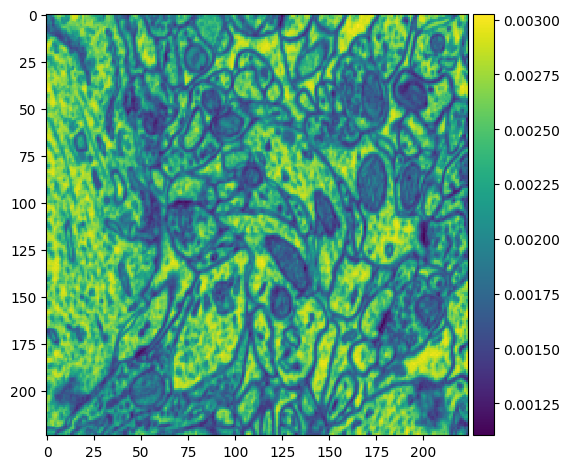

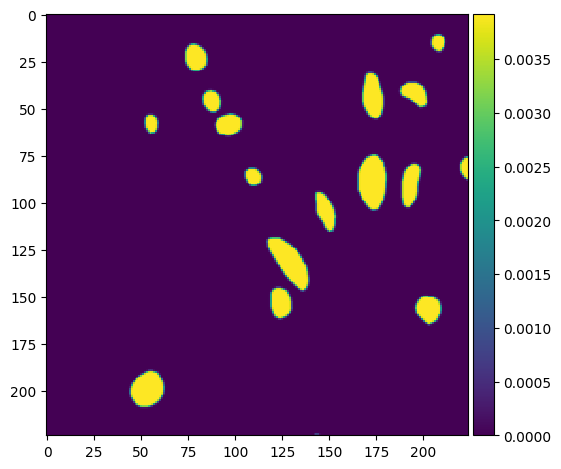

In [28]:
image_x = random.randint(0, len(sample_ids))

imshow(preprocessed_images_training_x[image_x])
plt.show()
imshow(np.squeeze(preprocessed_images_training_y[image_x]))
plt.show()

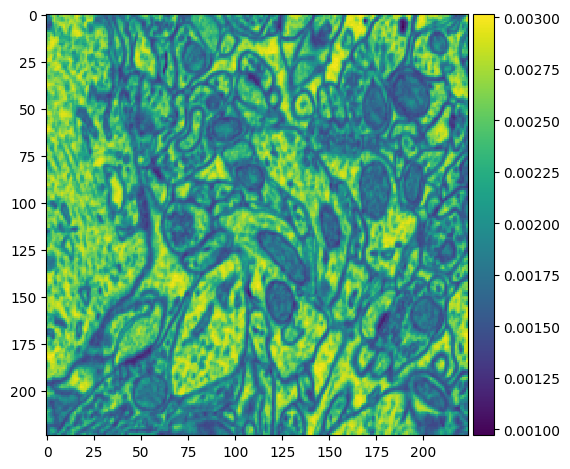

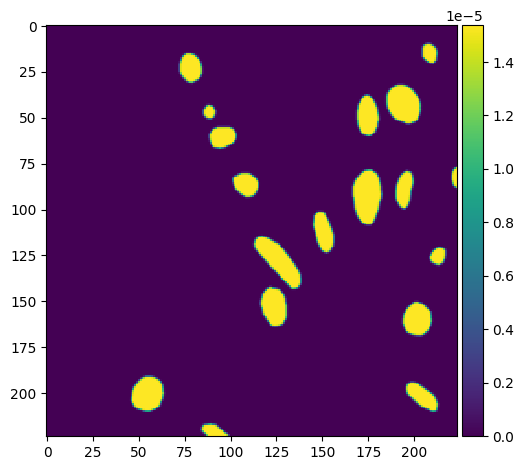

In [29]:
image_x = random.randint(0, len(sample_ids))

imshow(combined_preprocessed[image_x])
plt.show()
imshow(np.squeeze(combined_labels[image_x]))
plt.show()

<h2 style="color:#FF7C00  ">  Building Unet model </h2>

In [30]:
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, 1))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#################### Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#################### Expansive path
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 lambda (Lambda)             (None, 224, 224, 1)          0         ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 224, 224, 16)         160       ['lambda[0][0]']              
                                                                                                  
 dropout (Dropout)           (None, 224, 224, 16)         0         ['conv2d[0][0]']              
                                                                                              

In [32]:
X_train

array([[[0.002097  , 0.00193381, 0.00182641, ..., 0.0027677 ,
         0.00272998, 0.00266769],
        [0.00202232, 0.00201774, 0.00184818, ..., 0.00274844,
         0.0025218 , 0.00229659],
        [0.00187484, 0.00197826, 0.00186622, ..., 0.00274616,
         0.00239424, 0.00222721],
        ...,
        [0.00194182, 0.00209144, 0.00207209, ..., 0.00207817,
         0.00188967, 0.0017546 ],
        [0.00216465, 0.00221408, 0.0022334 , ..., 0.00203366,
         0.00202804, 0.00162748],
        [0.00190339, 0.00199023, 0.00222406, ..., 0.00227113,
         0.00204185, 0.00145089]],

       [[0.00234745, 0.00241478, 0.00217776, ..., 0.00134611,
         0.00149085, 0.0018768 ],
        [0.00231862, 0.0024845 , 0.00234925, ..., 0.00149988,
         0.00153831, 0.00168408],
        [0.00242253, 0.00253777, 0.00235054, ..., 0.0015813 ,
         0.00167247, 0.0017052 ],
        ...,
        [0.0018571 , 0.00212325, 0.00237988, ..., 0.00207756,
         0.00210098, 0.00259968],
        [0.0

### => Available callbacks
callbacks = [          
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),           
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    tf.keras.callbacks.ModelCheckpoint(filepath='model_checkpoint.h5', save_best_only=True),           
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    tf.keras.callbacks.TensorBoard(log_dir='logs'),           
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=1),           
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    tf.keras.callbacks.CSVLogger(filename='training_log.csv'),           
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    tf.keras.callbacks.TerminateOnNaN(),           
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: print(logs)),           
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * (0.1 ** (epoch // 10)))           
]      

It is also possible to create a custom callback classes by subclassing tf.keras.callbacks.Callback and implementing the desired callback methods.      


In [33]:
""" Clear the TensorFlow session """
#tf.keras.backend.clear_session()

#### Define the ModelCheckpoint callback
checkpointer = tf.keras.callbacks.ModelCheckpoint(
    filepath='model_for_nuclei.h5',
    verbose=1,
    save_best_only=True
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir='logs')
]

In [35]:
""" Training """
model.fit(preprocessed_images_training_x, preprocessed_images_training_y)

6/6 [==============================] - 88s 13s/step - loss: 0.6776 - accuracy: 0.8855


In [36]:
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=25, callbacks=callbacks)

Epoch 1/25
15/15 [==============================] - 122s 8s/step - loss: 0.0370 - accuracy: 0.9116 - val_loss: 1.2504e-05 - val_accuracy: 0.9151
Epoch 2/25
15/15 [==============================] - 122s 8s/step - loss: 1.3069e-05 - accuracy: 0.9116 - val_loss: 1.2504e-05 - val_accuracy: 0.9151
Epoch 3/25
15/15 [==============================] - 116s 8s/step - loss: 1.3069e-05 - accuracy: 0.9116 - val_loss: 1.2504e-05 - val_accuracy: 0.9151


In [37]:
""" Make preditions on the 3 sets """
idx = random.randint(0, len(X_train))

preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

3/3 [==============================] - 8s 3s/step


In [38]:
print(f"preds_train_t.shape: {preds_train_t.shape}")
print(f"preds_val_t.shape: {preds_val_t.shape}")
print(f"preds_test_t.shape: {preds_test_t.shape}")

preds_train_t.shape: (237, 224, 224, 1)
preds_val_t.shape: (27, 224, 224, 1)
preds_test_t.shape: (66, 224, 224, 1)


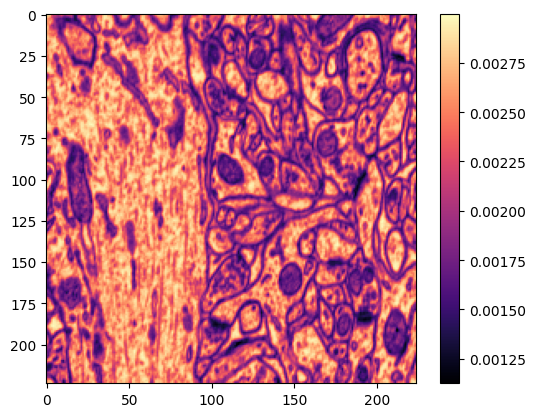

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


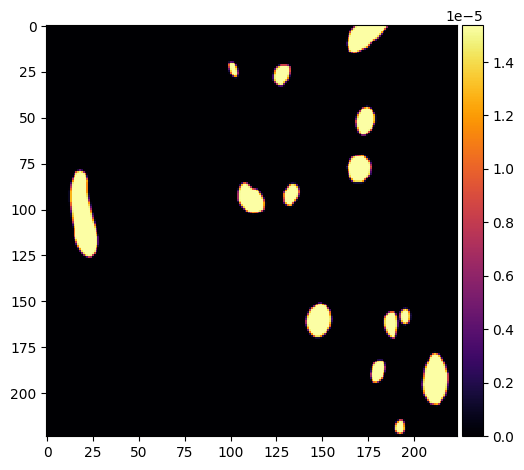

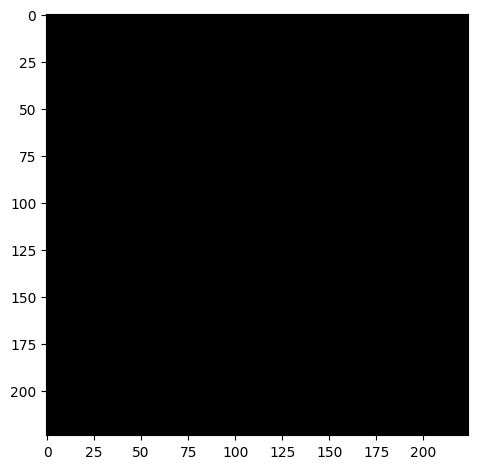

In [39]:
""" Perform a sanity check on some random training samples. """
ix = random.randint(0, len(preds_train_t))
colormap = 'magma'
colormap1 = 'plasma'
colormap2 = 'inferno'

plt.imshow(X_train[ix], cmap=colormap)
# Add a colorbar for reference
plt.colorbar()
plt.show()
imshow(np.squeeze(Y_train[ix]), cmap=colormap2)
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

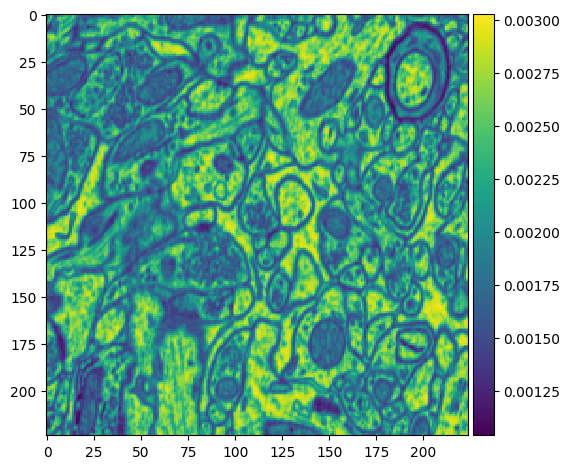

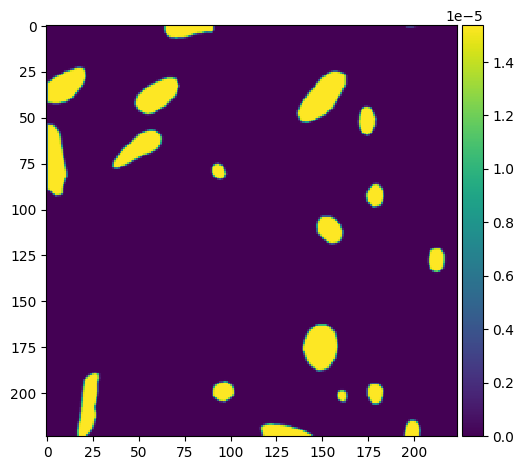

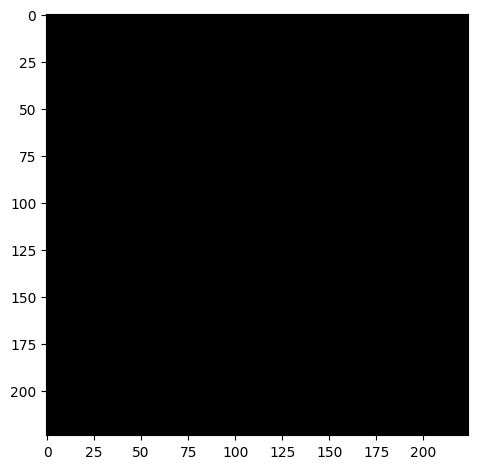

In [40]:
""" Perform a sanity check on some random validation samples. """
ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()